In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.patches import Rectangle
import seaborn as sns
from datetime import datetime

In [2]:
exams = pd.read_parquet('exams.parquet')

In [3]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 533417 entries, 2020-07-01 07:28:47.017000 to 2022-06-30 23:44:45.623000
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   OrdDate         533413 non-null  datetime64[ns]
 1   SchDate         533417 non-null  datetime64[ns]
 2   EndDate         494088 non-null  datetime64[ns]
 3   acc             533417 non-null  string        
 4   Pt_Status       533417 non-null  category      
 5   ProtocolSystem  533417 non-null  category      
 6   DOB             533417 non-null  datetime64[ns]
 7   Age             533417 non-null  int64         
 8   sex             533417 non-null  category      
 9   ProtocolID      533417 non-null  int64         
 10  ProtocolCode    533391 non-null  category      
 11  Modality        533394 non-null  category      
 12  Division        533394 non-null  category      
 13  OrdExam         533394 non-null  category

In [1]:
exams.Age.hist()

NameError: name 'exams' is not defined

In [86]:
exams[(~ exams.OrdExam.isna()) & exams.OrdExam.str.match(r"CT.TH")].OrdExam.value_counts().head(20)

CT.TH.CHEST       83055
CT.TH.CHESTPE     14812
CT.TH.CHESTSCR     7254
CT.TH.CHESTPT        10
CT.TH.CHESTPEA        2
MR.NE.SACPLX          0
MR.VA.AGFERUN         0
MR.VA.AGCHEST         0
MR.VA.AGAORARC        0
MR.VA.AGABD           0
MR.TH.CHEST           0
MR.NE.TMJ             0
MR.NE.SPINEO          0
CT.3D.ABDPEL          0
MR.VA.AGPEL           0
MR.NE.NECKAG          0
MR.NE.NECK            0
MR.NE.HEADAG          0
MR.NE.FACE            0
MR.NE.BRNOR           0
Name: OrdExam, dtype: int64

In [10]:
exams['Pt_Status'].value_counts(dropna=False)

O    316875
E    109555
I    106987
Name: Pt_Status, dtype: int64

In [4]:
ct_exams=exams[(exams['Modality'] == 'CT') & (exams['Ex_stat'].isin(['F','A']))][['OrdDate', 'SchDate', 'EndDate', 'Pt_Status', 'ProtocolSystem', 'ProtocolID', 'ProtocolCode']]
ct_exams.reset_index(drop=False, inplace=True)
ct_exams['OP_interval']=(ct_exams['ProtDate']-ct_exams['OrdDate']).dt.total_seconds()/3600
ct_exams['PE_interval']=(ct_exams['EndDate']-ct_exams['ProtDate']).dt.total_seconds()/3600
ct_exams['OE_interval']=(ct_exams['EndDate']-ct_exams['OrdDate']).dt.total_seconds()/3600
ct_exams=ct_exams[['Pt_Status', 'ProtocolSystem', 'ProtocolID', 'ProtocolCode', 'OrdDate', 'ProtDate', 'SchDate', 'EndDate', 'OP_interval', 'PE_interval', 'OE_interval']]
ct_exams.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317597 entries, 0 to 317596
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Pt_Status       317597 non-null  category      
 1   ProtocolSystem  317597 non-null  category      
 2   ProtocolID      317597 non-null  int64         
 3   ProtocolCode    317571 non-null  category      
 4   OrdDate         317597 non-null  datetime64[ns]
 5   ProtDate        317597 non-null  datetime64[ns]
 6   SchDate         317597 non-null  datetime64[ns]
 7   EndDate         317595 non-null  datetime64[ns]
 8   OP_interval     317597 non-null  float64       
 9   PE_interval     317595 non-null  float64       
 10  OE_interval     317595 non-null  float64       
dtypes: category(3), datetime64[ns](4), float64(3), int64(1)
memory usage: 20.6 MB


In [15]:
ct_exams.groupby(['Quarter', 'ProtocolSystem']).ProtocolCode.nunique()

Quarter  ProtocolSystem
2020Q3   APE                25
         RadDash           203
2020Q4   APE                27
         RadDash           208
2021Q1   APE                26
         RadDash           205
2021Q2   APE                36
         RadDash           226
2021Q3   APE                61
         RadDash           226
2021Q4   APE                66
         RadDash           227
2022Q1   APE               108
         RadDash           220
2022Q2   APE               109
         RadDash           212
Name: ProtocolCode, dtype: int64

In [54]:
ct_exams[['OP_interval', 'PE_interval', 'OE_interval']].describe()

,OP_interval,PE_interval,OE_interval
count,317597.000000,317595.000000,317595.000000
mean,486.986732,274.330489,761.318779
std,1394.383759,754.932528,1619.064502
min,-0.774581,-5.087211,0.036111
25%,0.043225,1.826238,2.302778
50%,0.681983,8.964340,22.851944
75%,167.044833,183.857871,719.342778
max,26187.223912,8820.529694,26373.348611


In [57]:
ct_exams.groupby(['Pt_Status', 'ProtocolSystem'])[['OP_interval']].describe()

OP_interval                                      \
                               count         mean          std       min   
Pt_Status ProtocolSystem                                                   
E         APE                44462.0     0.179763    18.237145 -0.028465   
          RadDash            40400.0     2.111303    69.699005  0.007191   
I         APE                29958.0     0.526143    50.007414 -0.021102   
          RadDash            34193.0     3.487954   105.514908 -0.774581   
O         APE                67893.0   361.722266  1165.519360  0.001869   
          RadDash           100691.0  1289.874967  2050.894351  0.008094   

                                                                            
                                25%         50%          75%           max  
Pt_Status ProtocolSystem                                                    
E         APE              0.011003    0.015254     0.019511   3427.209047  
          RadDash          0.144274    0.299279     0.684212   7753.278322  
I         APE              0.011077    0.015260     0.019530   7996.970298  
          RadDash          0.192037    0.519926     1.454597  16797.260789  
O         APE              0.200209    1.877769    97.987167  22312.017731  
          RadDash         51.633143  431.210325  1734.368346  26187.223912

/Users/talkasab/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


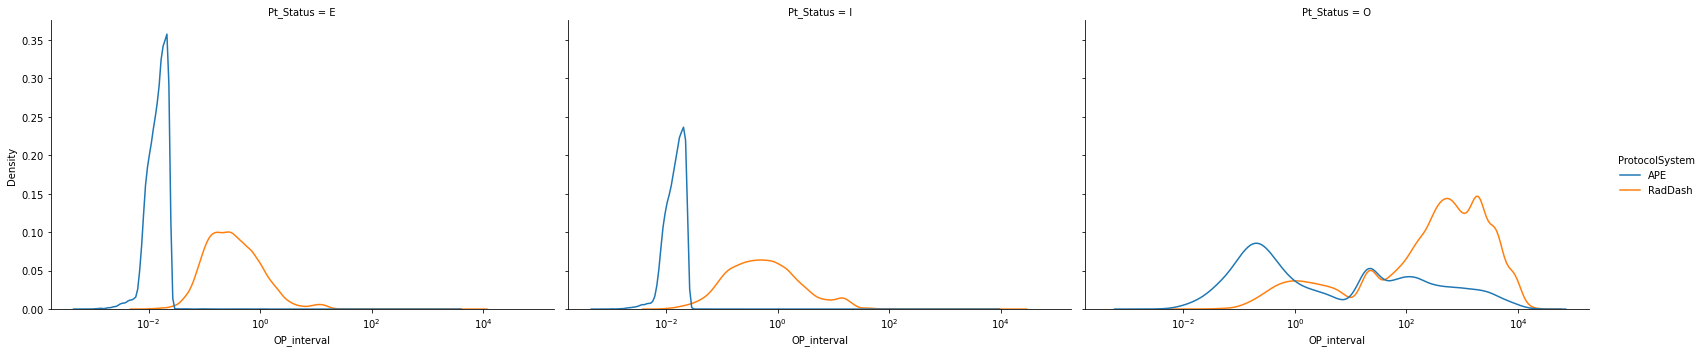

In [55]:
sns.displot(ct_exams, x='OP_interval', hue='ProtocolSystem', col='Pt_Status', kind='kde', log_scale=(True, False), height=5, aspect=1.5)

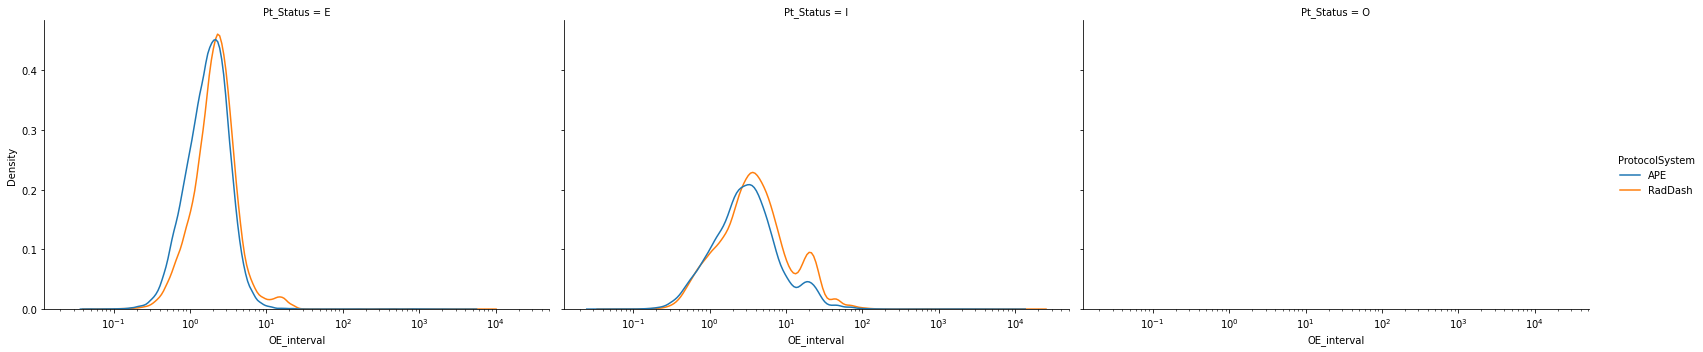

In [56]:
sns.displot(ct_exams[ct_exams['Pt_Status'].isin(['E', 'I'])], x='OE_interval', hue='ProtocolSystem', col='Pt_Status', kind='kde', log_scale=(True, False), height=5, aspect=1.5)
plt.show()

/Users/talkasab/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


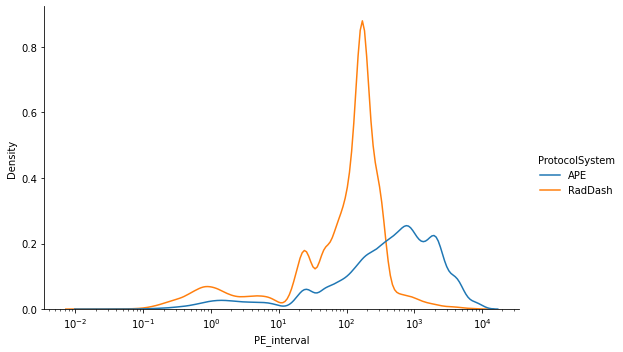

In [60]:
sns.displot(ct_exams[ct_exams['Pt_Status'].eq('O')], x='PE_interval', hue='ProtocolSystem', kind='kde', log_scale=(True, False), height=5, aspect=1.5)

In [14]:
cutoffs=np.array(pd.to_datetime([ '2020-01-01', '2020-10-01', 
                                 '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
                                 '2022-01-01', '2022-04-01', '2023-01-01']))
quarter_labels=["2020Q3", "2020Q4", "2021Q1", "2021Q2", "2021Q3", "2021Q4", "2022Q1", "2022Q2"]
ct_exams['Quarter'] = pd.cut(ct_exams['ProtDate'], bins=cutoffs, labels=quarter_labels)
ct_exams.Quarter.value_counts(dropna=True)

2021Q2    43122
2021Q3    42808
2021Q4    42164
2022Q1    40944
2021Q1    39555
2020Q3    36972
2020Q4    36658
2022Q2    35374
Name: Quarter, dtype: int64

In [69]:
ct_exams.groupby("Year").ProtocolSystem.value_counts(normalize=True) #.unstack().plot(kind='bar', stacked=True)

Year         
2020  RadDash    0.720345
      APE        0.279655
2021  RadDash    0.557826
      APE        0.442174
2022  APE        0.623601
      RadDash    0.376399
Name: ProtocolSystem, dtype: float64

In [80]:
ct_exams.groupby("Year").ProtocolSystem.value_counts(normalize=False) #.unstack().plot(kind='bar', stacked=True)

Year         
2020  RadDash    53039
      APE        20591
2021  RadDash    93519
      APE        74130
2022  APE        47592
      RadDash    28726
Name: ProtocolSystem, dtype: int64

In [70]:
import pingouin

ModuleNotFoundError: No module named 'pingouin'

In [73]:
import pingouin

In [81]:
expected, observed, stats = pingouin.chi2_independence(data=ct_exams, x='Year', y='ProtocolSystem', correction=False)
stats[stats['test']=='pearson']

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,17976.501606,2.0,0.0,0.237911,1.0
